In [3]:
from fastai.vision.all import *

In [2]:
# import zipfile

# with zipfile.ZipFile('/storage/RockPaperScissors.zip', 'r') as zip_ref:
#     zip_ref.extractall('/storage/RockPaperScissors')

KeyboardInterrupt: 

In [4]:
path = Path('/storage/RockPaperScissors/RockPaperScissors/data/')
path.ls()

(#4) [Path('/storage/RockPaperScissors/RockPaperScissors/data/test2'),Path('/storage/RockPaperScissors/RockPaperScissors/data/valid'),Path('/storage/RockPaperScissors/RockPaperScissors/data/.DS_Store'),Path('/storage/RockPaperScissors/RockPaperScissors/data/train')]

In [5]:
def get_dls(bs, size):
    dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                       get_items = get_image_files,
                       get_y = parent_label,
                       splitter = GrandparentSplitter(),
                       item_tfms = Resize(size)
                      )
    return dblock.dataloaders(path, bs = bs)

In [9]:
dls = get_dls(128, 64)
learn = Learner(dls, xresnet50(), loss_func = CrossEntropyLossFlat(), metrics = accuracy)
learn.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.779953,16.667440,0.333333,00:14
1,0.729020,6.444287,0.486559,00:08
2,0.389500,1.461892,0.736559,00:08
3,0.231420,1.325465,0.755376,00:08


In [10]:
learn.dls = get_dls(64, 128)
learn.fine_tune(3, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.061183,4.343699,0.467742,00:28


epoch,train_loss,valid_loss,accuracy,time
0,0.008853,1.515094,0.720430,00:21
1,0.004884,1.180427,0.739247,00:21
2,0.002125,0.999620,0.755376,00:21


## With Learning Rate finder

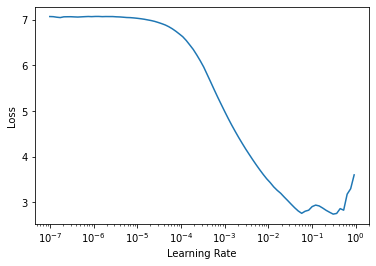

In [6]:
# finding the best learning rate
dls = get_dls(128, 64)
learn = Learner(dls, xresnet50(), loss_func = CrossEntropyLossFlat(), metrics = accuracy)
lr_min, lr_steep = learn.lr_find()

In [7]:
lr_min, lr_steep

(0.03019951581954956, 0.0004786300996784121)

In [8]:
learn = Learner(dls, xresnet50(), loss_func = CrossEntropyLossFlat(), metrics = accuracy)
learn.fit_one_cycle(10, 4e-4)

epoch,train_loss,valid_loss,accuracy,time
0,6.425895,6.341261,0.333333,00:09
1,3.214385,1.180134,0.723118,00:07
2,1.730160,0.935553,0.782258,00:08
3,1.029482,1.125892,0.771505,00:08
4,0.646029,1.154231,0.771505,00:08
5,0.418050,1.161806,0.776882,00:08
6,0.275665,1.256622,0.771505,00:08
7,0.184184,1.220979,0.782258,00:08
8,0.124069,1.191748,0.782258,00:07
9,0.084157,1.187401,0.784946,00:08


In [9]:
learn.dls = get_dls(64, 128)
learn.fine_tune(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.085178,1.276578,0.731183,00:28


epoch,train_loss,valid_loss,accuracy,time
0,0.010137,0.808632,0.760753,00:22
1,0.005093,1.300784,0.725806,00:22
2,0.002405,0.984145,0.774194,00:22
3,0.001151,1.010334,0.768817,00:21
4,0.000610,0.990853,0.771505,00:22


### With Diff learning rate

In [11]:
dls = get_dls(128, 64)
learn = Learner(dls, xresnet50(), loss_func = CrossEntropyLossFlat(), metrics = accuracy)
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.081435,4.645339,0.333333,00:08
1,1.742782,2.226122,0.486559,00:08
2,0.934647,1.639549,0.588710,00:08
3,0.555560,0.758898,0.798387,00:08
4,0.348279,0.737653,0.817204,00:08
5,0.225137,0.798785,0.822581,00:08
6,0.148263,0.742677,0.838710,00:08
7,0.098804,0.723769,0.838710,00:08
8,0.066379,0.713535,0.838710,00:08
9,0.044877,0.730622,0.838710,00:08


In [12]:
learn.dls = get_dls(64, 128)
learn.fine_tune(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.061934,3.985895,0.615591,00:22


epoch,train_loss,valid_loss,accuracy,time
0,0.006260,0.556294,0.841398,00:22
1,0.022811,0.819751,0.768817,00:22
2,0.013013,1.065741,0.768817,00:21
3,0.006111,1.019545,0.774194,00:22
4,0.003018,0.937195,0.776882,00:22


## Finally, a diff transfer learning model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.0012022644514217973)

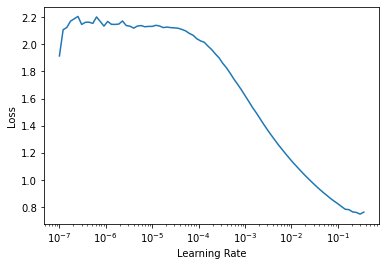

In [13]:
dls = get_dls(64, 128)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.lr_find()

In [14]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.837403,0.287924,0.911290,00:09
1,0.288506,0.312964,0.897849,00:08
2,0.124103,0.236420,0.935484,00:08
3,0.056744,0.277026,0.911290,00:08
4,0.028115,0.209109,0.943548,00:08
5,0.013680,0.270373,0.919355,00:08
6,0.007221,0.279572,0.908602,00:09
7,0.003706,0.267935,0.924731,00:09
8,0.002613,0.257088,0.922043,00:08
9,0.001571,0.247293,0.930108,00:09


In [15]:
learn.dls = get_dls(128, 224)
learn.fine_tune(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.254604,0.847144,0.685484,00:25


epoch,train_loss,valid_loss,accuracy,time
0,0.010477,0.292883,0.948925,00:29
1,0.004507,0.351700,0.948925,00:28
2,0.002477,0.328416,0.946237,00:29
3,0.001495,0.308189,0.951613,00:28
4,0.000995,0.318280,0.946237,00:28
